# Visualize House Sales Data

Let's use pandas and matplotlib to help us to visualize sales data.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Read and Display data

In [2]:
data_location = "/data/house-prices/house-sales-simplified.csv"
# data_location = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-simplified.csv'

house_prices = pd.read_csv(data_location)
house_prices

,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
0,1,9/16/14,280000,1000102,Multiplex,6,3.00,2400,9373,1991,98002
1,2,6/16/06,1000000,1200013,Single Family,4,3.75,3764,20156,2005,98166
2,3,1/29/07,745000,1200019,Single Family,4,1.75,2060,26036,1947,98166
3,4,2/25/08,425000,2800016,Single Family,5,3.75,3200,8618,1966,98168
4,5,3/29/13,240000,2800024,Single Family,4,1.75,1720,8620,1948,98168
...,...,...,...,...,...,...,...,...,...,...,...
27058,27059,10/31/12,374000,9895000030,Townhouse,2,1.75,1410,1161,2011,-1
27059,27060,12/7/12,374000,9895000040,Townhouse,2,1.75,1410,1005,2011,-1
27060,27061,7/9/12,165000,9899200010,Single Family,4,1.00,1070,11170,1971,98055
27061,27062,5/26/06,315000,9900000355,Single Family,3,2.00,1345,6223,1939,98166


## 'Summary' of data

In [3]:
## TODO : use describe to get an idea of the data
## Hint : 'describe' 
house_prices.describe()

,ID,SalePrice,PropertyID,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
count,27063.000000,2.706300e+04,2.706300e+04,27063.000000,27063.000000,27063.000000,2.706300e+04,27063.000000,27063.000000
mean,13532.000000,5.116262e+05,4.680325e+09,3.380150,2.255552,2122.963160,1.099768e+04,1977.086871,82223.038244
std,7812.559504,3.428212e+05,2.896351e+09,0.895447,0.771191,939.839476,2.811066e+04,30.921491,36106.665559
min,1.000000,3.000000e+03,1.000102e+06,0.000000,0.000000,370.000000,4.940000e+02,1900.000000,-1.000000
25%,6766.500000,3.290000e+05,2.213000e+09,3.000000,1.750000,1440.000000,4.257500e+03,1954.000000,98019.000000
50%,13532.000000,4.250000e+05,3.972900e+09,3.000000,2.500000,1940.000000,6.636000e+03,1986.000000,98053.000000
75%,20297.500000,5.900000e+05,7.504001e+09,4.000000,2.500000,2610.000000,9.450000e+03,2006.000000,98115.000000
max,27063.000000,1.100000e+07,9.906000e+09,33.000000,8.000000,10740.000000,1.024068e+06,2016.000000,98354.000000


## Histogram / Frequency Plot
Create a frequency table & histogram plot based on number of bedrooms

In [4]:
## calculate a frequency count
## Hint : group by 'Bedrooms'
freq_count = house_prices.groupby("Bedrooms").size()
freq_count

Bedrooms
0        12
1       164
2      3415
3     12074
4      9190
5      1872
6       275
7        41
8        10
9         5
11        3
13        1
33        1
dtype: int64

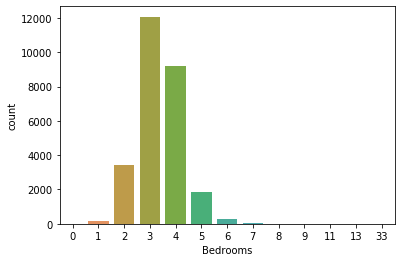

In [5]:
sns.countplot(data=house_prices, x="Bedrooms")

## Create a BoxPlot on sale prices 
Sale prices per property type  (Single Family, Townhouse)

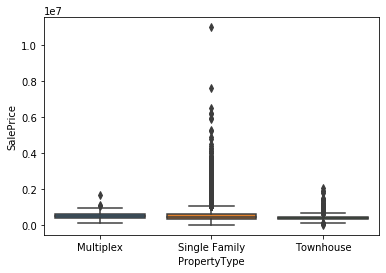

In [6]:
## TODO : data=price_by_property_type
sns.boxplot(x="PropertyType", y="SalePrice",  data=house_prices);

## Bonus Lab : Improving our plot
Our plot data is pretty 'squished'  Let's see if we can improve it.  
Some of the outliers (like the 33 bedroom house is messing up the display).  
Let's remove the outliers.

In [7]:
## We are going to remove 10% off the data from the bottom and top

## first calculate 10%  and 90% prices
## Hint : supply the right parameters for quantile (10% --> 0.1,  90% --> 0.9)
ten_ninety = house_prices.SalePrice.quantile([.1, .9])

## extract 10% and 90% into variables
ten_percent_price = int(house_prices.SalePrice.quantile(.1))
ninety_percent_price = int(house_prices.SalePrice.quantile(.9))
print("10% price=", ten_percent_price,  ", 90% price=", ninety_percent_price)

10% price= 260000 , 90% price= 820000


total sales  27063
above 10%  24411
below 90%  27063
between 10% and 90% = 21,716


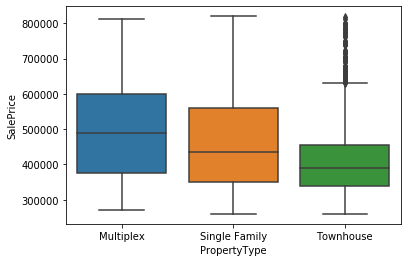

In [16]:
## filter out below 10% and above 90%
print("total sales ", len(house_prices.index))

## filter prices above 10%  (hint : ten_percent_price)
above_ten = house_prices[house_prices["SalePrice"] >= ten_percent_price]
print("above 10% " , len(above_ten.index))

## filter prices below 90%  (hint : <= ninety_percent_price)
below_ninety  = house_prices.filter(house_prices["SalePrice"] <= ninety_percent_price)
print("below 90% ", len(below_ninety.index))
## filter above 10% and below 90% in one query
above_ten_below_ninety = house_prices.loc[(house_prices['SalePrice'] >= ten_percent_price) & (house_prices['SalePrice'] <=  ninety_percent_price)]
print("between 10% and 90% = {:,}".format(above_ten_below_ninety.shape[0]))

sns.boxplot(x="PropertyType", y="SalePrice",  data=above_ten_below_ninety)

In [ ]:
sns.boxplot(x="PropertyType", y="SalePrice",  data=above_ten_below_ninety)

## Any other plots?
Look at [MatplotLib Examples](https://matplotlib.org/gallery.html).
If any of them inspire you try to create a graph like that!
And do show it off to the class  :-)